# Single Neuron Linear Regression Model
In this notebook, I will implement a single neuron model alongside the gradient descent algorithm, in order to solve the linear regression problem. We will be using the breast cancer dataset

In [86]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv("../DataSets/Advertising.csv")

In [87]:
df.iloc[:100]

,Index,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
95,96,163.3,31.6,52.9,16.9
96,97,197.6,3.5,5.9,11.7
97,98,184.9,21.0,22.0,15.5
98,99,289.7,42.3,51.2,25.4


In [88]:
X = df[["TV", "radio", "newspaper"]].values
y = df.sales.values
print(X)
print(y)

[[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]
 [  8.7  48.9  75. ]
 [ 57.5  32.8  23.5]
 [120.2  19.6  11.6]
 [  8.6   2.1   1. ]
 [199.8   2.6  21.2]
 [ 66.1   5.8  24.2]
 [214.7  24.    4. ]
 [ 23.8  35.1  65.9]
 [ 97.5   7.6   7.2]
 [204.1  32.9  46. ]
 [195.4  47.7  52.9]
 [ 67.8  36.6 114. ]
 [281.4  39.6  55.8]
 [ 69.2  20.5  18.3]
 [147.3  23.9  19.1]
 [218.4  27.7  53.4]
 [237.4   5.1  23.5]
 [ 13.2  15.9  49.6]
 [228.3  16.9  26.2]
 [ 62.3  12.6  18.3]
 [262.9   3.5  19.5]
 [142.9  29.3  12.6]
 [240.1  16.7  22.9]
 [248.8  27.1  22.9]
 [ 70.6  16.   40.8]
 [292.9  28.3  43.2]
 [112.9  17.4  38.6]
 [ 97.2   1.5  30. ]
 [265.6  20.    0.3]
 [ 95.7   1.4   7.4]
 [290.7   4.1   8.5]
 [266.9  43.8   5. ]
 [ 74.7  49.4  45.7]
 [ 43.1  26.7  35.1]
 [228.   37.7  32. ]
 [202.5  22.3  31.6]
 [177.   33.4  38.7]
 [293.6  27.7   1.8]
 [206.9   8.4  26.4]
 [ 25.1  25.7  43.3]
 [175.1  22.5  31.5]
 [ 89.7   9.9  35.7]
 [239.9  41.5

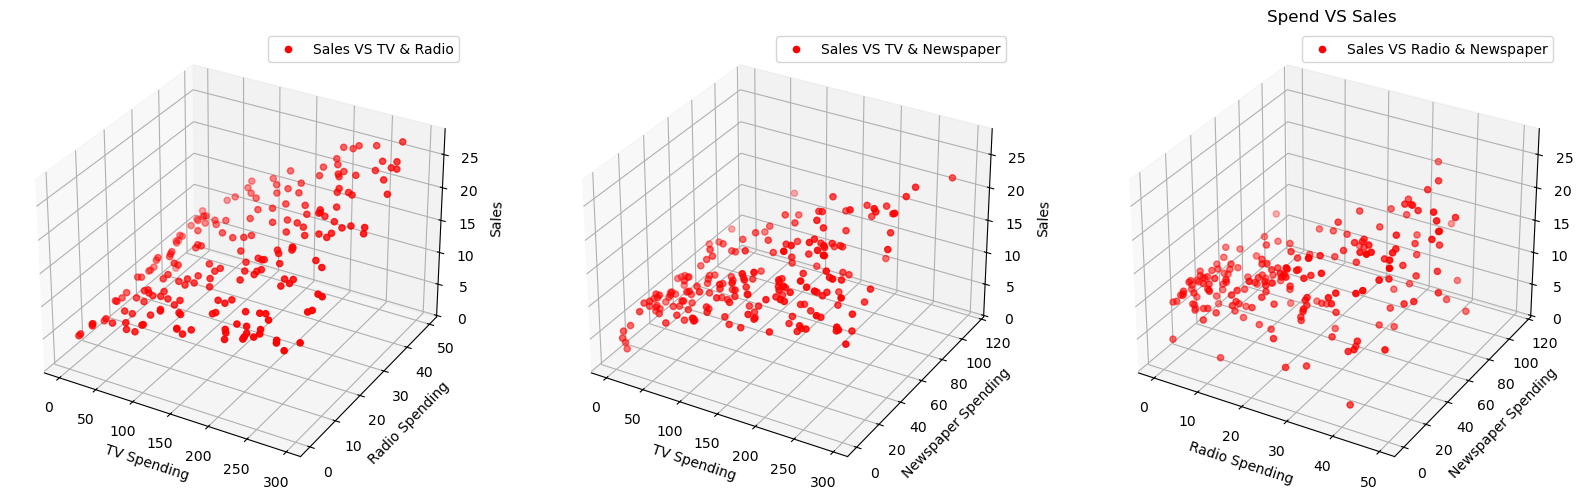

In [89]:
fig = plt.figure(figsize=(20,20))

attr_lst = ["TV", "Radio", "Newspaper"]
k = 0
for k, (i, j) in enumerate([(0,1), (0,2), (1,2)], start=1):
    ax = fig.add_subplot(1, 3, k, projection="3d")
    ax.scatter(X[:, i], X[:, j], y, c="red", label="Sales VS " + attr_lst[i] +" & "+ attr_lst[j])
    ax.set_xlabel(attr_lst[i] + " Spending")
    ax.set_ylabel(attr_lst[j] + " Spending")
    ax.set_zlabel("Sales")
    ax.legend()
    k += 1

#ax1 = fig.add_subpplot(112, projection="3d")
#ax.scatter(X[:, 0], X[:, 0], y, c="blue", label="Sales VS TV & Newspaper")
#ax.set_xlabel("TV Spending")
#ax.set_ylabel("Newspaper Spending")
#ax.set_zlabel("Sales")

#ax.legend()
plt.title("Spend VS Sales")
plt.show()

In [91]:
class SingleNeuron(object):
    """
    A class used to represent a Single Neuron

    Attributes
    ----------
    inputs : array
        an array of inputs to the perceptron
    outputs : array
        an array of expected outputs from the perceptron
    alpha : float
        the learning rate
    epochs : int
        the number of epochs to train

    Methods
    -------
    train()
        trains the perceptron for self.epoch iterations, to produce self.outputs from self.inputs.

    train_err_limit(self, percent_err, max_epochs=None)
        trains the perceptron until it reaches a certain percent_error rate or until max_epochs are reached.

    update_weights()
        updates the weights of the perceptron(self.w_) once using self.inputs and comparing with self.outputs.

    net_input(inputs):
        calculates the net input to the perceptron, by multiplying a given input with the weights and adding the bias.
    
    predict():
        calculates the output the perceptron produces for a given input.
    
    """
    def __init__(self, inputs, outputs, activation_function, alpha = 0.005, epochs = 100):
        if not(isinstance(epochs, int)):
            raise TypeError("epochs must be an integer.")
        if epochs < 1:
            raise ValueError("Epochs must be less than 1")
        if not isinstance(alpha, float):
            raise TypeError("aplha must be a float")
        if not (0 < alpha <= 1):
            raise ValueError("alpha must be between 0 and 1")
        if not isinstance(inputs, np.ndarray) or not isinstance(outputs, np.ndarray):
            raise TypeError("inputs and outputs must be NumPy arrays")
        if inputs.shape[0] != outputs.shape[0]:
            raise ValueError("inputs and outputs must have the same number of samples")
        if len(outputs.shape) != 1:
            raise ValueError("outputs must be a 1D array")
        
        self.activation_function = activation_function 
        self.alpha = alpha
        self.epochs = epochs
        self.inputs = inputs
        self.outputs = outputs
        self.w_ = np.random.rand(1+inputs.shape[1])
        self.errors_ = []
    
    def train(self):
        N = self.inputs.shape[0]

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(self.inputs, self.outputs):
                error = target - self.predict(xi)
                update_val = self.alpha * error
                print(update_val)
                self.w_[:-1] -= update_val*xi
                self.w_[-1] -= update_val
                errors += 0.5 * (update_val ** 2)
            self.errors_.append(errors/N)
        return self
    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)



In [93]:
def linear_activation(z):
    return z
node = SingleNeuron(X, y,  linear_activation)
node.train()
print(self.errors_)

-0.1319987832159111
-9.92668472289614
-289.7791570017122
-12970.525303386752
-2038616.3912604565
-66584721.50255499
-1411964155.2999606
-56453225264.71934
-311210274086.1516
-9666512742600.322
-667221480319887.1
-5.022656536485504e+16
-1.5728123841210417e+18
-2.9419080375888777e+19
-3.09523603770325e+21
-6.821701296756185e+23
-7.203016393582875e+25
-9.889643403551837e+27
-1.0563489326926106e+30
-6.043086120150832e+31
-1.0320156438995596e+34
-2.7583324529561536e+36
-6.073558475837756e+37
-2.1515522567106282e+39
-1.6126613976586838e+41
-1.4184789009399958e+43
-2.6972941726048553e+45
-4.777546045975408e+47
-1.455328160167249e+50
-1.3821252719232663e+52
-1.6366729913833548e+54
-2.8899509325782997e+56
-1.7813947149851208e+58
-2.3475087324140706e+60
-2.99575266261981e+62
-4.2685064432650947e+64
-1.6646071300721166e+67
-1.8633604639616767e+69
-5.831111711008459e+70
-3.681197778846796e+72
-8.871203068339676e+74
-1.6850741472792844e+77
-4.4891292193951645e+79
-1.3730057520751201e+82
-4.51715895

C:\Users\ism_s\AppData\Local\Temp\ipykernel_26256\2450707523.py:69: RuntimeWarning: overflow encountered in scalar power
  errors += 0.5 * (update_val ** 2)


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


NameError: name 'self' is not defined

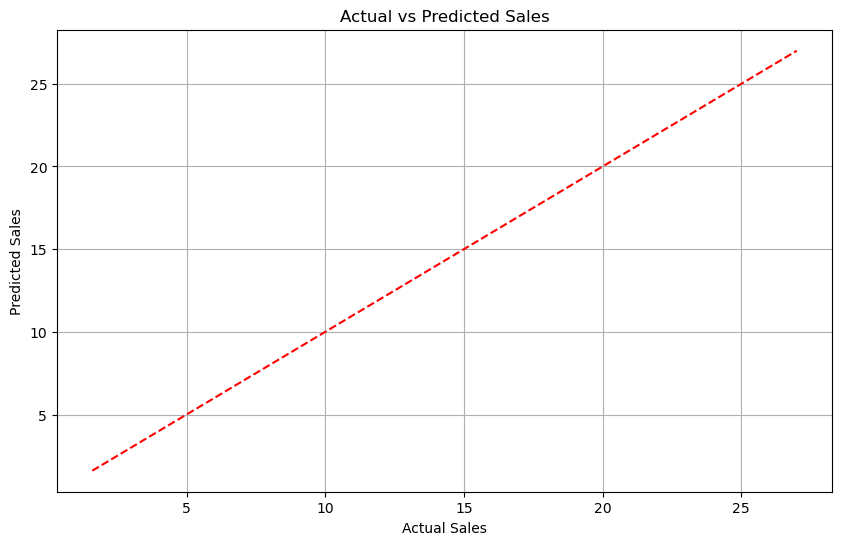

In [85]:
y_pred = node.predict(X)

# You can add this to one of the 3D subplots, or plot actual vs predicted:
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, c='blue')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--')  # Line y = x
plt.grid(True)
plt.show()
